# 🚀 AI Challenge: Smart Resume-to-Job Matching System

Kjo është një sfidë në 3 faza që do t'ju udhëheqë nga analiza fillestare deri tek ndërtimi i një modeli AI për përputhjen e CV-ve me përshkrimet e punës (JDs).

## 🔹 Detyra 1: Analiza dhe Përpunimi i të Dhënave

***Niveli:*** Fillestar

***Objektivat:***
- Eksploroni datasetin e CV-ve dhe JD-ve
- Pastroni të dhënat tekstuale
- Nxirrni karakteristika të thjeshta NLP

In [1]:
!pip install pandas numpy matplotlib seaborn nltk scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Text processing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# ML  libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Download required NLTK data
# nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger_eng', quiet=True)
# nltk.download('averaged_perceptron_tagger', quiet=True)

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

In [3]:
# Load the datasets
resume_df = pd.read_csv('Challenge-Data/Resume.csv')
jd_df = pd.read_csv('Challenge-Data/JDs.csv')

print(f"Resume dataset: {resume_df.shape}")
print(f"Job Description dataset: {jd_df.shape}")

Resume dataset: (2484, 4)
Job Description dataset: (853, 5)


In [4]:
resume_df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [5]:
# Resume dataset overview
print(resume_df.info())
print("\n")
print(f"\nMissing values:")
print(resume_df.isnull().sum())
print("\n")
print(f"\nUnique categories:")
print(resume_df['Category'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB
None



Missing values:
ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64



Unique categories:
Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR         

No missing values for the resume dataset.

In [6]:
jd_df.head()

,company_name,job_description,position_title,description_length,model_response
0,Google,minimum qualifications\nbachelors degree or eq...,Sales Specialist,2727,"{\n ""Core Responsibilities"": ""Responsible fo..."
1,Apple,description\nas an asc you will be highly infl...,Apple Solutions Consultant,828,"{\n ""Core Responsibilities"": ""as an asc you ..."
2,Netflix,its an amazing time to be joining netflix as w...,Licensing Coordinator - Consumer Products,3205,"{\n ""Core Responsibilities"": ""Help drive bus..."
3,Robert Half,description\n\nweb designers looking to expand...,Web Designer,2489,"{\n ""Core Responsibilities"": ""Designing webs..."
4,TrackFive,at trackfive weve got big goals were on a miss...,Web Developer,3167,"{\n ""Core Responsibilities"": ""Build and layo..."


In [7]:
# JD dataset overview
print(jd_df.info())
print("\n")
print(f"\nMissing values:")
print(jd_df.isnull().sum())
print("\n")
print(f"\nUnique categories:")
print(jd_df['description_length'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   company_name        853 non-null    object
 1   job_description     853 non-null    object
 2   position_title      853 non-null    object
 3   description_length  853 non-null    int64 
 4   model_response      853 non-null    object
dtypes: int64(1), object(4)
memory usage: 33.4+ KB
None



Missing values:
company_name          0
job_description       0
position_title        0
description_length    0
model_response        0
dtype: int64



Unique categories:
count      853.000000
mean      3335.600234
std       2094.794724
min         14.000000
25%       1961.000000
50%       3078.000000
75%       4404.000000
max      23924.000000
Name: description_length, dtype: float64


Again, no missing values here neither.

In [8]:
# Statistical analysis of CV and JD categories

# Resume categories analysis
resume_category_counts = resume_df['Category'].value_counts()
print("Resume categories distribution:")
print(resume_category_counts)

# Job description companies analysis
jd_company_counts = jd_df['company_name'].value_counts()
print(f"\nTop 10 companies by number of job postings:")
print(jd_company_counts.head(10))

# Position titles analysis
jd_position_counts = jd_df['position_title'].value_counts()
print(f"\nTop 10 most common position titles:")
print(jd_position_counts.head(10))

Resume categories distribution:
Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

Top 10 companies by number of job postings:
company_name
Google                                                                                  1
The Computer Merchant, Ltd                                       

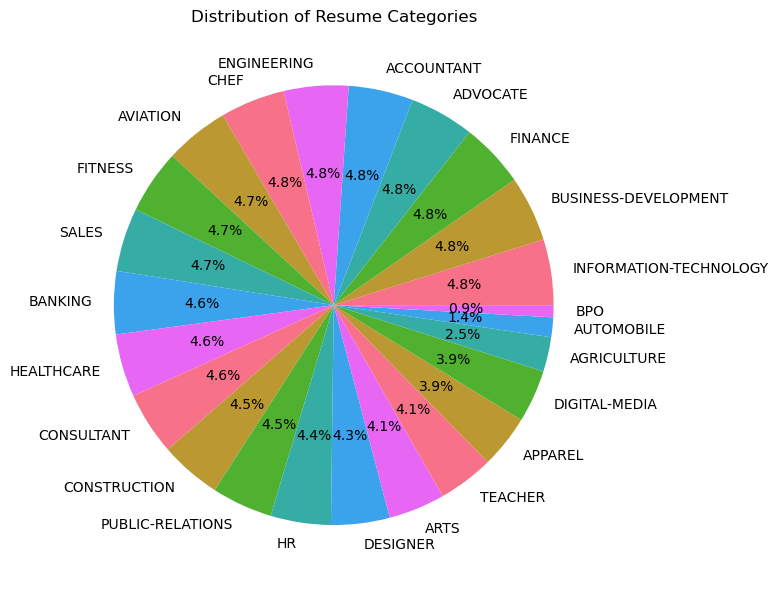

In [9]:
# Distribution of Resume Categories
plt.figure(figsize=(8, 6))
plt.pie(
    resume_category_counts.values,
    labels=resume_category_counts.index,
    autopct='%1.1f%%'
)
plt.title('Distribution of Resume Categories')
plt.tight_layout()
plt.show()

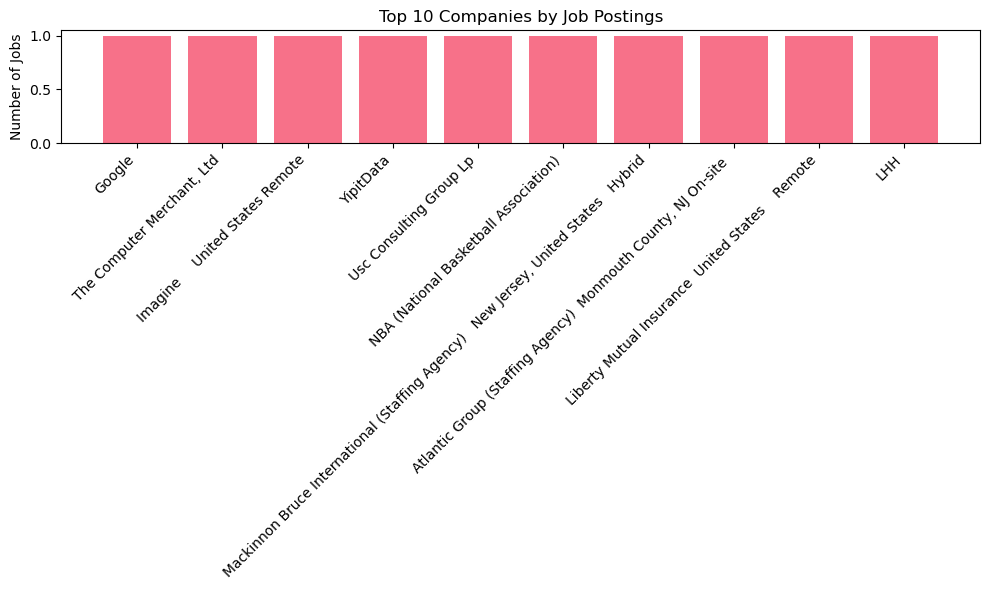

In [10]:
# Top 10 Companies by Job Postings
top_companies = jd_company_counts.head(10)
plt.figure(figsize=(10, 6))
plt.bar(
    range(len(top_companies)),
    top_companies.values
)
plt.xticks(
    range(len(top_companies)),
    top_companies.index,
    rotation=45,
    ha='right'
)
plt.ylabel('Number of Jobs')
plt.title('Top 10 Companies by Job Postings')
plt.tight_layout()
plt.show()

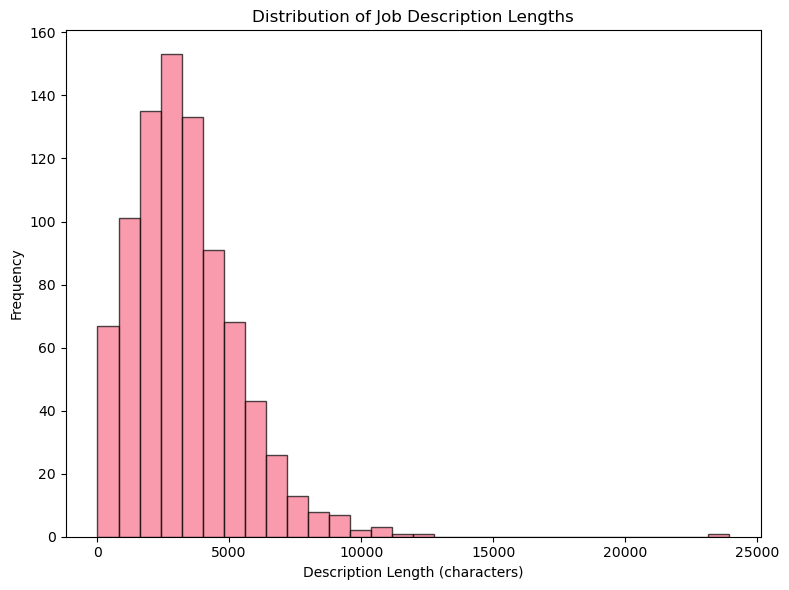

In [11]:
# Distribution of Job Description Lengths
plt.figure(figsize=(8, 6))
plt.hist(
    jd_df['description_length'],
    bins=30,
    alpha=0.7,
    edgecolor='black'
)
plt.xlabel('Description Length (characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Job Description Lengths')
plt.tight_layout()
plt.show()

The distribution of job description lengths is unimodal and right-skewed, with a concentration around 3,000 characters.

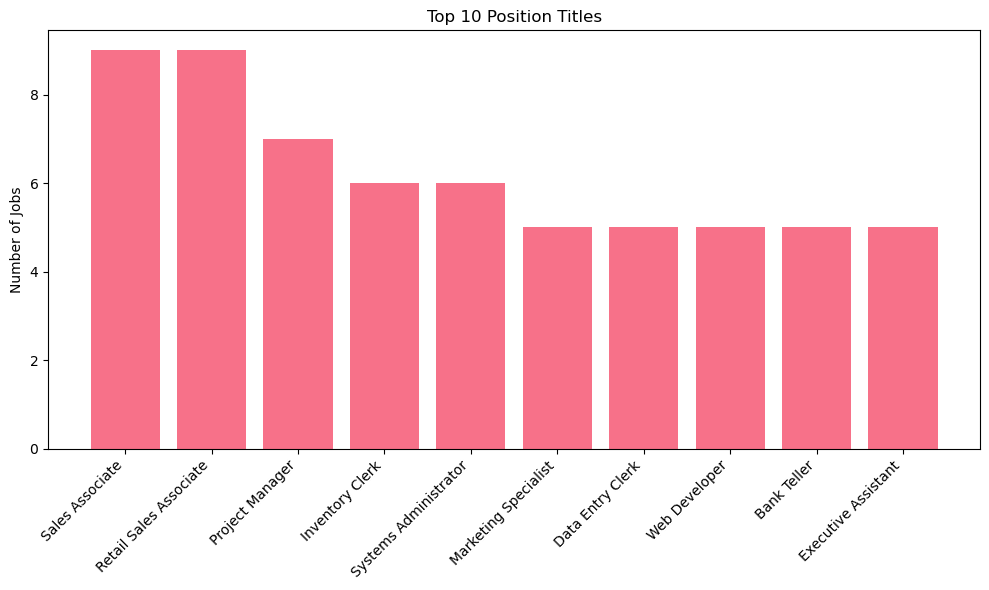

In [12]:
# Top 10 Position Titles
top_positions = jd_position_counts.head(10)
plt.figure(figsize=(10, 6))
plt.bar(
    range(len(top_positions)),
    top_positions.values
)
plt.xticks(
    range(len(top_positions)),
    top_positions.index,
    rotation=45,
    ha='right'
)
plt.ylabel('Number of Jobs')
plt.title('Top 10 Position Titles')
plt.tight_layout()
plt.show()

In [ ]:
# Text preprocessing functions with enhanced stopword removal
class TextPreprocessor:
    def __init__(self):
        # Original NLTK stopwords
        self.stop_words = set(stopwords.words('english'))
        
        # Additional custom stopwords as specified
        custom_stopwords = {
            "the", "or", "and", "a", "an", "as", "be", "can", "in", "of", "on", "for", "to", "with", "by", 
            "we", "will", "company", "name", "skill", "city", "state", "education", "experience", 
            "provide", "team", "time", "work", "responsibility", "other", "ensure", "include",
            "job", "apply", "need", "store", "that", "base", "benefit", "employee", "analytical", 
            "business", "development", "sale", "engineering", "you", "all", "at", "from", "have", 
            "this", "it", "not", "s"
        }
        
        # Combine both sets of stopwords
        self.stop_words.update(custom_stopwords)
        
        self.lemmatizer = WordNetLemmatizer()
        
    def get_wordnet_pos(self, word): # Map POS tag to first character lemmatizer expects
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)
    
    def clean_text(self, text): # Clean text by removing special characters, digits, and extra whitespace
        if pd.isna(text): 
            return ""
        
        # Convert to lowercase
        text = text.lower()
        
        # Remove HTML tags
        text = re.sub(r'<[^>]+>', '', text)
        
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)
        
        # Remove email addresses
        text = re.sub(r'\S+@\S+', '', text)
        
        # Remove phone numbers
        text = re.sub(r'\+?\d[\d\s\-\(\)]+', '', text)
        
        # Remove non-ASCII characters
        text = re.sub(r'[^\x00-\x7F]+', '', text)
        
        # Remove punctuation and digits
        text = re.sub(r'[^\w\s]', ' ', text)
        text = re.sub(r'\d+', '', text)
        
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        
        return text
    
    def tokenize_and_lemmatize(self, text):
        """Tokenize text and lemmatize words"""
        if not text:
            return []
        
        # Tokenize
        tokens = word_tokenize(text)
        
        # Remove stopwords and lemmatize
        processed_tokens = []
        for token in tokens:
            if token not in self.stop_words and len(token) > 2:
                lemmatized = self.lemmatizer.lemmatize(token, self.get_wordnet_pos(token))
                processed_tokens.append(lemmatized)
        
        return processed_tokens
    
    def preprocess_text(self, text):
        """Complete preprocessing pipeline"""
        cleaned = self.clean_text(text)
        tokens = self.tokenize_and_lemmatize(cleaned)
        return ' '.join(tokens)

# Initialize preprocessor with enhanced stopwords and clean the data
print("Starting text preprocessing with enhanced stopword removal...")
preprocessor = TextPreprocessor()

# Preprocess resume data
resume_df['cleaned_resume'] = resume_df['Resume_str'].apply(preprocessor.preprocess_text)

# Preprocess job description data
jd_df['cleaned_job_description'] = jd_df['job_description'].apply(preprocessor.preprocess_text)

print("Enhanced text preprocessing completed!")
print(f"Total stopwords being filtered: {len(preprocessor.stop_words)}")

# Check preprocessing results
print("\nSample of cleaned resume text:")
print(resume_df['cleaned_resume'].iloc[0][:500])

print("\nSample of cleaned job description text:")
print(jd_df['cleaned_job_description'].iloc[0][:500])

In [14]:
# Initialize preprocessor and clean the data
preprocessor = TextPreprocessor()

# Preprocess resume data
resume_df['cleaned_resume'] = resume_df['Resume_str'].apply(preprocessor.preprocess_text)

# Preprocess job description data
jd_df['cleaned_job_description'] = jd_df['job_description'].apply(preprocessor.preprocess_text)

# Check preprocessing results
print("\nSample of cleaned resume text:")
print(resume_df['cleaned_resume'].iloc[0][:500])

print("\nSample of cleaned job description text:")
print(jd_df['cleaned_job_description'].iloc[0][:500])


Sample of cleaned resume text:
administrator marketing associate administrator summary dedicate customer service manager year experience hospitality customer service management respect builder leader customer focus team strives instill share enthusiastic commitment customer service highlight focus customer satisfaction team management marketing savvy conflict resolution technique training development skilled multi tasker client relation specialist accomplishment missouri dot supervisor training certification certify ihg custo

Sample of cleaned job description text:
minimum qualification bachelor degree equivalent practical experience year experience saas productivity tool businessexperience manage enterprise account sale cycle prefer qualification year experience building strategic business partnership enterprise customersability work reseller ecosystem scale businessability plan pitch execute territory business strategyability build relationship deliver result crossfunctionalmatrixe

In [15]:
# Check preprocessing results

for i in range(10):
    print(f"\nSample of cleaned resume {i} text:")
    print(resume_df['cleaned_resume'].iloc[i][:1000])

    print(f"\nSample of cleaned job description {i} text:")
    print(jd_df['cleaned_job_description'].iloc[i][:1000])


Sample of cleaned resume 0 text:
administrator marketing associate administrator summary dedicate customer service manager year experience hospitality customer service management respect builder leader customer focus team strives instill share enthusiastic commitment customer service highlight focus customer satisfaction team management marketing savvy conflict resolution technique training development skilled multi tasker client relation specialist accomplishment missouri dot supervisor training certification certify ihg customer loyalty marketing segment hilton worldwide general manager training certification accomplish trainer cross server hospitality system hilton onq micros opera pm fidelio opera reservation system or holidex complete course seminar customer service sale strategy inventory control loss prevention safety time management leadership performance assessment experience administrator marketing associate administrator dec current company name city state help develop poli

In [16]:
# Word frequency analysis by job category from a list of texts
def get_word_frequencies(texts, top_n=20):
    all_words = []
    for text in texts:
        if pd.notna(text) and text:
            all_words.extend(text.split())
    
    word_freq = Counter(all_words)
    return word_freq.most_common(top_n)

# Analyze word frequencies by resume category
categories = resume_df['Category'].unique()

word_freq_by_category = {}
for category in categories:
    category_resumes = resume_df[resume_df['Category'] == category]['cleaned_resume']
    word_freq_by_category[category] = get_word_frequencies(category_resumes, top_n=15)
    
    print(f"\nTop 15 words in {category}:")
    for word, freq in word_freq_by_category[category]:
        print(f"{word}: {freq}")


Top 15 words in HR:
employee: 1321
management: 949
company: 769
state: 700
resource: 616
human: 595
city: 568
process: 529
training: 514
benefit: 460
new: 457
name: 456
program: 454
manager: 435
hire: 426

Top 15 words in DESIGNER:
design: 1281
state: 751
city: 730
company: 662
designer: 565
name: 547
work: 449
project: 446
create: 323
product: 313
client: 313
graphic: 296
customer: 289
skill: 288
art: 264

Top 15 words in INFORMATION-TECHNOLOGY:
system: 1325
management: 898
information: 855
technology: 818
support: 782
network: 751
project: 707
state: 667
company: 663
city: 616
server: 568
business: 558
data: 557
software: 542
name: 522

Top 15 words in TEACHER:
student: 1114
state: 746
teacher: 707
city: 641
company: 500
education: 470
name: 448
child: 427
skill: 422
school: 400
learn: 361
work: 349
classroom: 330
plan: 309
lesson: 291

Top 15 words in ADVOCATE:
customer: 1006
state: 944
city: 834
service: 811
company: 745
name: 628
skill: 535
client: 482
management: 479
work: 432
p

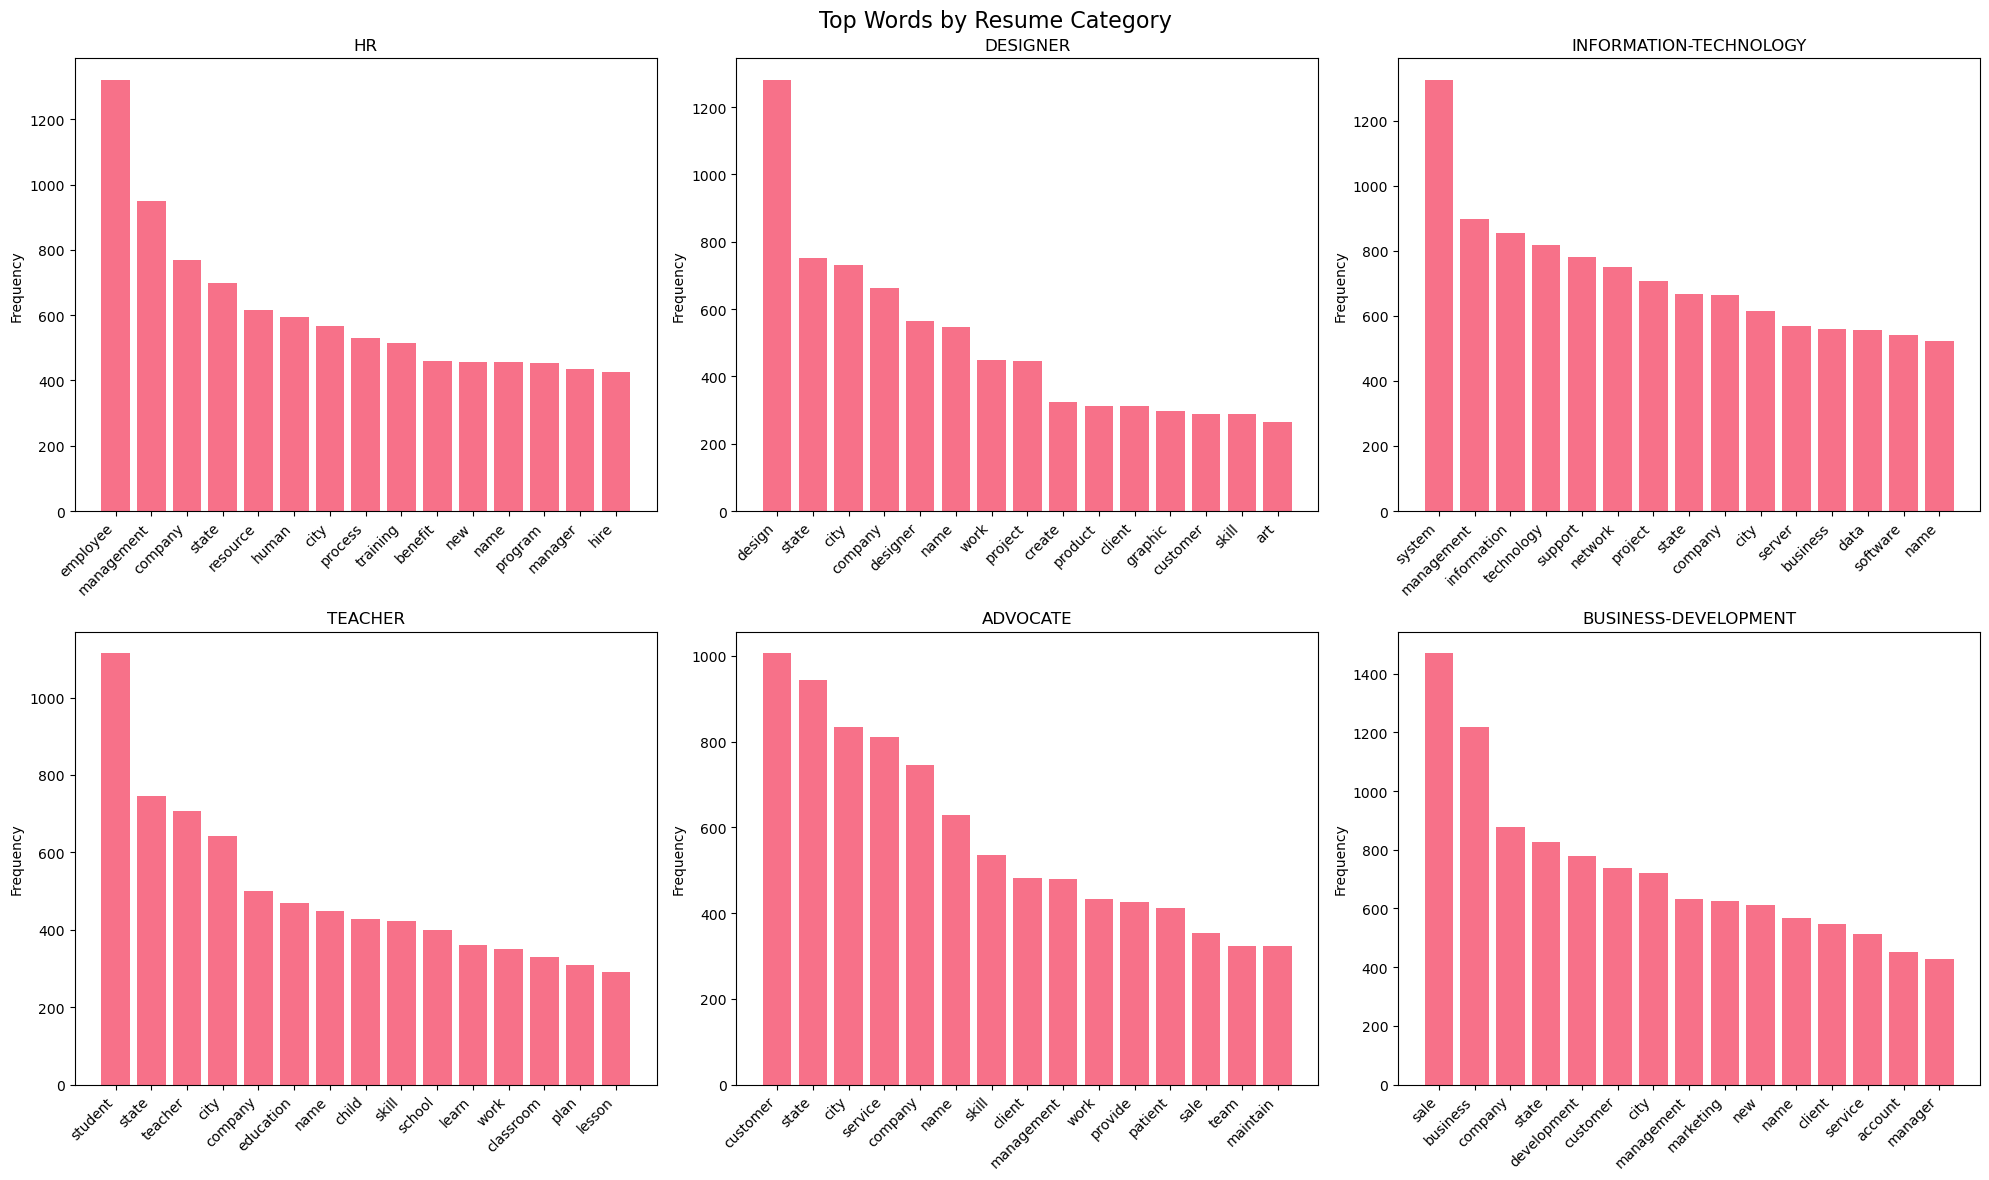

In [17]:
# Visualize word frequencies by category
def plot_word_frequency(word_freq_dict, title):
    n_categories = len(word_freq_dict)
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()
    
    for i, (category, word_freq) in enumerate(word_freq_dict.items()):
        if i < len(axes):
            words = [item[0] for item in word_freq]
            freqs = [item[1] for item in word_freq]
            
            axes[i].bar(range(len(words)), freqs)
            axes[i].set_title(f'{category}')
            axes[i].set_xticks(range(len(words)))
            axes[i].set_xticklabels(words, rotation=45, ha='right')
            axes[i].set_ylabel('Frequency')
    
    # Hide unused subplots
    for i in range(len(word_freq_dict), len(axes)):
        axes[i].set_visible(False)
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot word frequencies by resume category
plot_word_frequency(word_freq_by_category, 'Top Words by Resume Category')

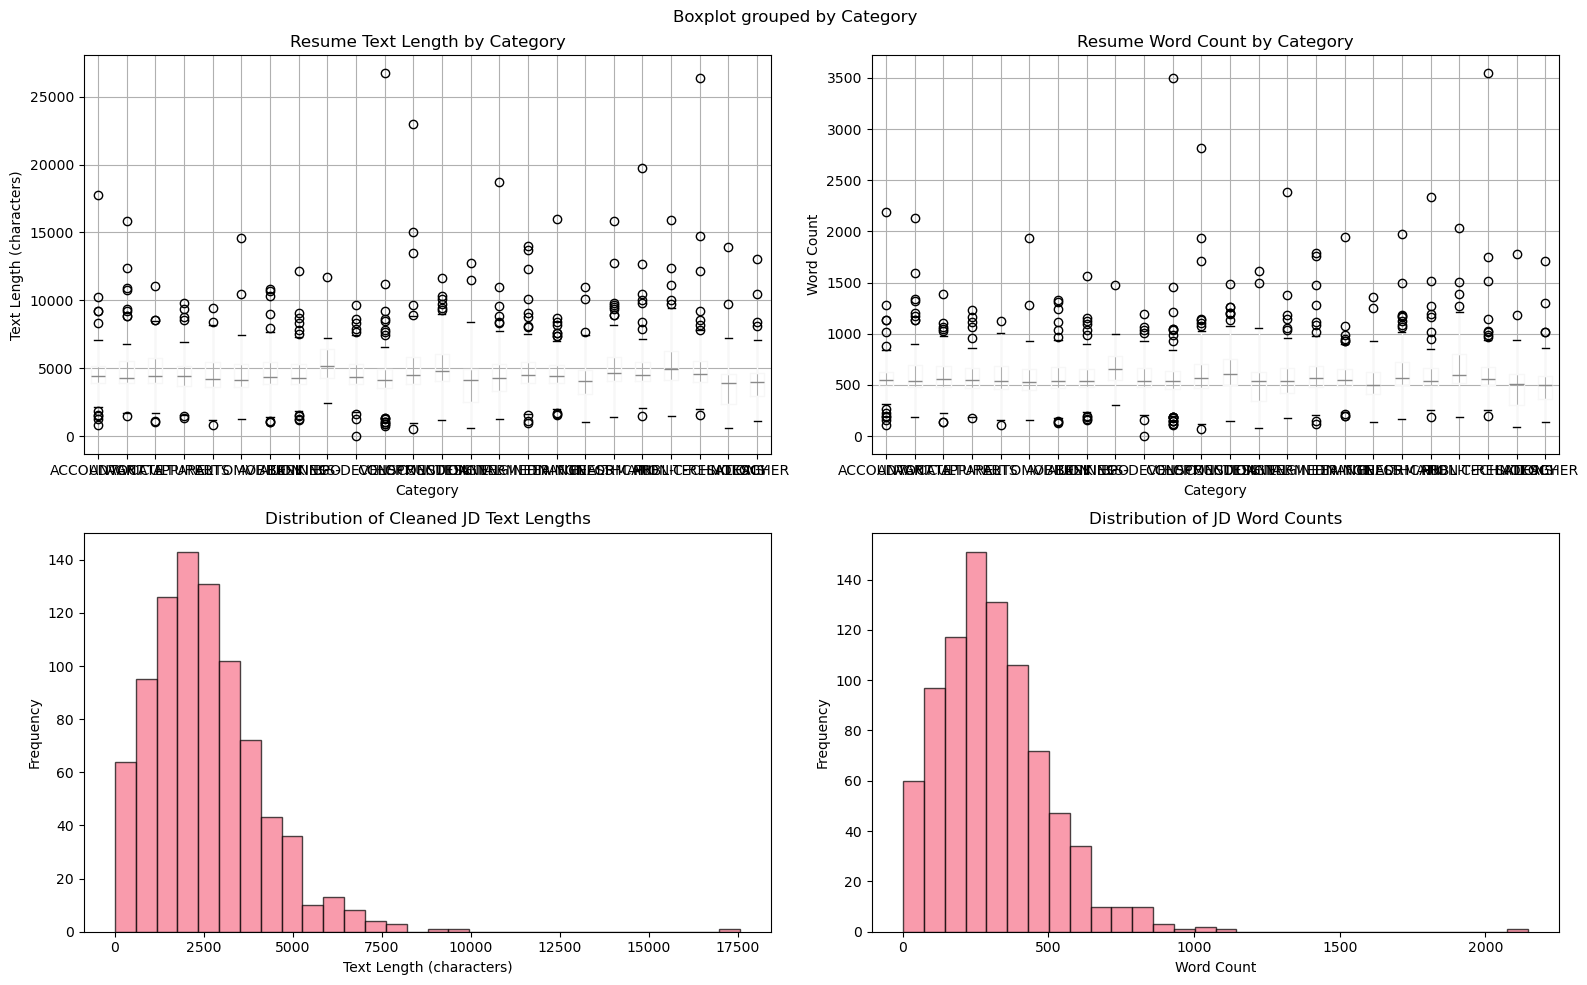

In [18]:
# Text length analysis
resume_df['text_length'] = resume_df['cleaned_resume'].str.len()
resume_df['word_count'] = resume_df['cleaned_resume'].str.split().str.len()

jd_df['cleaned_text_length'] = jd_df['cleaned_job_description'].str.len()
jd_df['word_count'] = jd_df['cleaned_job_description'].str.split().str.len()

# Visualize text statistics
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Resume text length by category
resume_df.boxplot(column='text_length', by='Category', ax=axes[0, 0])
axes[0, 0].set_title('Resume Text Length by Category')
axes[0, 0].set_xlabel('Category')
axes[0, 0].set_ylabel('Text Length (characters)')

# Resume word count by category
resume_df.boxplot(column='word_count', by='Category', ax=axes[0, 1])
axes[0, 1].set_title('Resume Word Count by Category')
axes[0, 1].set_xlabel('Category')
axes[0, 1].set_ylabel('Word Count')

# JD text length distribution
axes[1, 0].hist(jd_df['cleaned_text_length'], bins=30, alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Distribution of Cleaned JD Text Lengths')
axes[1, 0].set_xlabel('Text Length (characters)')
axes[1, 0].set_ylabel('Frequency')

# JD word count distribution
axes[1, 1].hist(jd_df['word_count'], bins=30, alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Distribution of JD Word Counts')
axes[1, 1].set_xlabel('Word Count')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 🔸 Detyra 2: Përputhja e CV-ve me JD

***Niveli:*** Mesatar

***Objektivat:***
- Përdorni TF-IDF ose embeddings për të krahasuar tekstet
- Llogaritni ngjashmërinë ndërmjet CV-ve dhe JD-ve
- Vizualizoni rezultatet

In [19]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.8,
    sublinear_tf=True
)

# Combine all texts for fitting the vectorizer
all_texts = list(resume_df['cleaned_resume'].fillna('')) + list(jd_df['cleaned_job_description'].fillna(''))

# Fit the vectorizer on all texts
tfidf_vectorizer.fit(all_texts)

# Transform resume and job description texts
resume_tfidf_matrix = tfidf_vectorizer.transform(resume_df['cleaned_resume'].fillna(''))
jd_tfidf_matrix = tfidf_vectorizer.transform(jd_df['cleaned_job_description'].fillna(''))

print(f"Resume TF-IDF matrix shape: {resume_tfidf_matrix.shape}")
print(f"JD TF-IDF matrix shape: {jd_tfidf_matrix.shape}")

Resume TF-IDF matrix shape: (2484, 5000)
JD TF-IDF matrix shape: (853, 5000)


In [20]:
# Compute cosine similarity between resumes and job descriptions
similarity_matrix = cosine_similarity(resume_tfidf_matrix, jd_tfidf_matrix)

print(f"Similarity matrix shape: {similarity_matrix.shape}") # A matrix of shape (n_resumes, n_jds) where each entry is in [0,1]
print(f"\nSimilarity matrix statistics:")
print(f"Min similarity: {similarity_matrix.min():.4f}")
print(f"Max similarity: {similarity_matrix.max():.4f}")
print(f"Mean similarity: {similarity_matrix.mean():.4f}")
print(f"Standard deviation: {similarity_matrix.std():.4f}")

Similarity matrix shape: (2484, 853)

Similarity matrix statistics:
Min similarity: 0.0000
Max similarity: 0.4223
Mean similarity: 0.0739
Standard deviation: 0.0346


In [21]:
# Function to find top N matching JDs for a given resume
def find_top_jd_matches(resume_idx, n_matches=5):
    similarities = similarity_matrix[resume_idx]
    top_indices = np.argsort(similarities)[-n_matches:][::-1]
    
    matches = []
    for idx in top_indices:
        matches.append({
            'jd_idx': idx,
            'similarity': similarities[idx],
            'company': jd_df.iloc[idx]['company_name'],
            'position': jd_df.iloc[idx]['position_title'],
            'description_preview': jd_df.iloc[idx]['job_description'][:200]
        })
    
    return matches

# Function to find top N matching resumes for a given JD
def find_top_resume_matches(jd_idx, n_matches=5):
    similarities = similarity_matrix[:, jd_idx]
    top_indices = np.argsort(similarities)[-n_matches:][::-1]
    
    matches = []
    for idx in top_indices:
        matches.append({
            'resume_idx': idx,
            'similarity': similarities[idx],
            'category': resume_df.iloc[idx]['Category'],
            'resume_preview': resume_df.iloc[idx]['Resume_str'][:200]
        })
    
    return matches

In [22]:
# Top 5 JD matches for first few resumes
for i in range(min(3, len(resume_df))):
    print(f"\nResume {i+1} (Category: {resume_df.iloc[i]['Category']}):")
    print(f"Resume preview: {resume_df.iloc[i]['Resume_str'][:150]}")
    
    matches = find_top_jd_matches(i, n_matches=5)
    
    print(f"\nTop 5 matching job descriptions:")
    for j, match in enumerate(matches, 1):
        print(f"{j}. {match['company']} - {match['position']} (Similarity: {match['similarity']:.4f})")
        print(f"   Description: {match['description_preview'][:100]}")


Resume 1 (Category: HR):
Resume preview:          HR ADMINISTRATOR/MARKETING ASSOCIATE

HR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in H

Top 5 matching job descriptions:
1. Marriott - Sales Executive Richmond Hotel (Similarity: 0.1788)
   Description: job number job category sales  marketinglocation southern region florida sales  nw  court miami flor
2. Aveda Institutes - Human Resources Generalist (Similarity: 0.1712)
   Description: human resources generalist aveda institutes  loveland oh sign in for commute time quick apply job de
3. PNC Bank - Investment Service Partner – Customer Service Rep – REMOTE OPTION (Similarity: 0.1515)
   Description: position overview

at pnc our people are our greatest differentiator and competitive advantage in th
4. Marriott International - Senior Catering Sales Executive (Similarity: 0.1488)
   Description: job number 
job category sales  marketing
location renaissance columbus downtown hotel  

In [23]:
# Top 5 resume matches for first few JDs
for i in range(min(3, len(jd_df))):
    print(f"\nJob Description {i+1}:")
    print(f"Company: {jd_df.iloc[i]['company_name']}")
    print(f"Position: {jd_df.iloc[i]['position_title']}")
    print(f"Description preview: {jd_df.iloc[i]['job_description'][:150]}...")
    
    matches = find_top_resume_matches(i, n_matches=5)
    
    print(f"\nTop 5 matching resumes:")
    for j, match in enumerate(matches, 1):
        print(f"{j}. Resume {match['resume_idx']+1} - {match['category']} (Similarity: {match['similarity']:.4f})")


Job Description 1:
Company: Google
Position: Sales Specialist
Description preview: minimum qualifications
bachelors degree or equivalent practical experience years of experience in saas or productivity tools businessexperience managi...

Top 5 matching resumes:
1. Resume 1236 - DIGITAL-MEDIA (Similarity: 0.1927)
2. Resume 300 - INFORMATION-TECHNOLOGY (Similarity: 0.1907)
3. Resume 1262 - DIGITAL-MEDIA (Similarity: 0.1807)
4. Resume 677 - BUSINESS-DEVELOPMENT (Similarity: 0.1802)
5. Resume 596 - BUSINESS-DEVELOPMENT (Similarity: 0.1801)

Job Description 2:
Company: Apple
Position: Apple Solutions Consultant
Description preview: description
as an asc you will be highly influential in growing mind and market share of apple products while building longterm relationships with tho...

Top 5 matching resumes:
1. Resume 421 - TEACHER (Similarity: 0.1647)
2. Resume 637 - BUSINESS-DEVELOPMENT (Similarity: 0.1372)
3. Resume 2176 - BANKING (Similarity: 0.1315)
4. Resume 660 - BUSINESS-DEVELOPMENT

Below is shown a visualization of similarity matrix

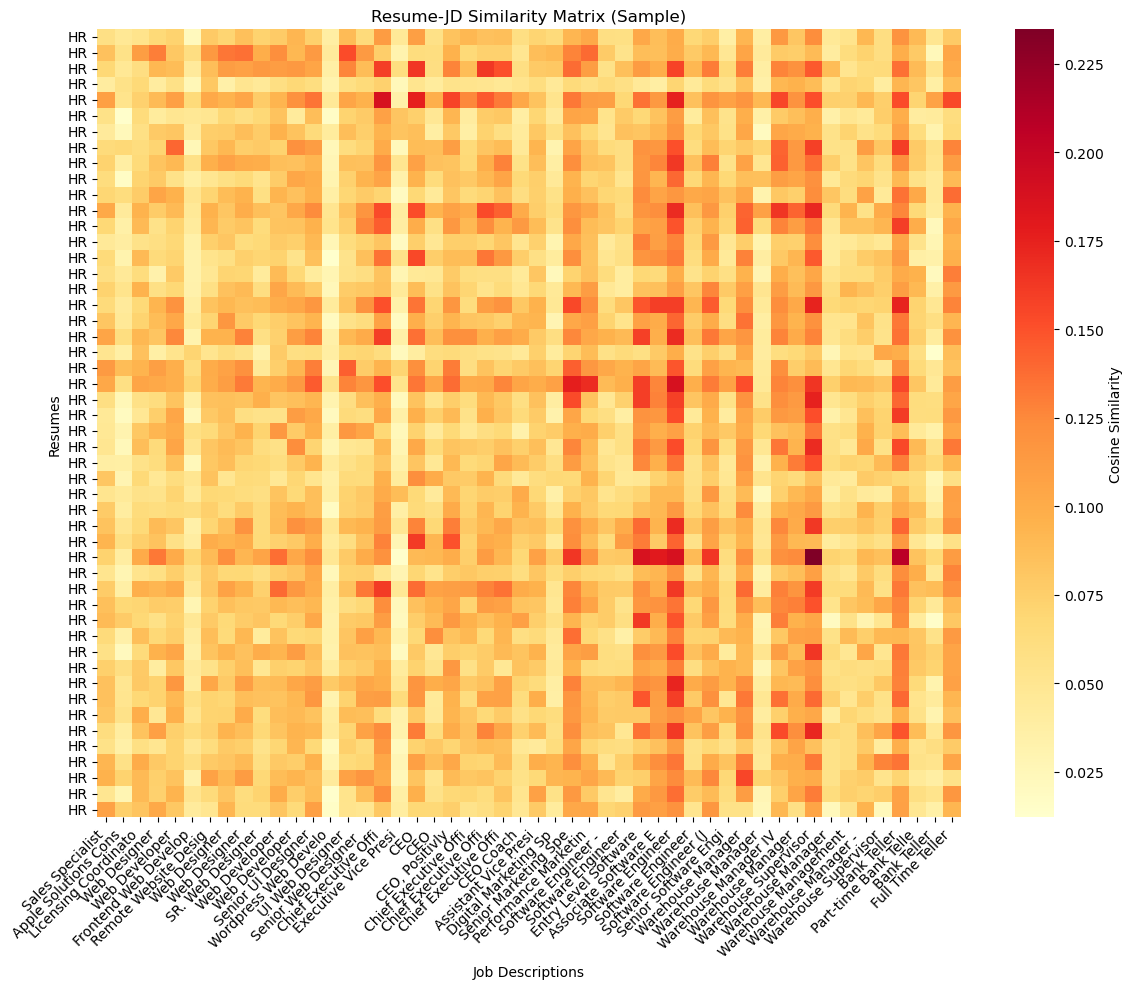

In [24]:
# Create a sample similarity matrix for visualization (first 50 resumes and JDs)
sample_size = min(50, len(resume_df), len(jd_df))
sample_similarity = similarity_matrix[:sample_size, :sample_size]

plt.figure(figsize=(12, 10))
sns.heatmap(sample_similarity, 
            xticklabels=jd_df.iloc[:sample_size]['position_title'].str[:20],
            yticklabels=resume_df.iloc[:sample_size]['Category'],
            cmap='YlOrRd',
            cbar_kws={'label': 'Cosine Similarity'})
plt.title('Resume-JD Similarity Matrix (Sample)')
plt.xlabel('Job Descriptions')
plt.ylabel('Resumes')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Now we will do an analysis of match quality by resume category. In other words, it measures per category how similar that category’s resumes tend to be to the JDs they match against. 

In [25]:
# Calculate average similarity scores by resume category
category_similarity_stats = {}
for category in resume_df['Category'].unique():
    category_indices = resume_df[resume_df['Category'] == category].index
    category_similarities = similarity_matrix[category_indices]
    
    # Get top 5 matches for each resume in this category
    top_similarities = []
    for idx in range(len(category_indices)):
        top_5_scores = np.sort(category_similarities[idx])[-5:]
        top_similarities.extend(top_5_scores)
    
    category_similarity_stats[category] = {
        'mean_similarity': np.mean(top_similarities),
        'median_similarity': np.median(top_similarities),
        'std_similarity': np.std(top_similarities),
        'max_similarity': np.max(top_similarities),
        'min_similarity': np.min(top_similarities)
    }

# Display results
similarity_comparison_df = pd.DataFrame(category_similarity_stats).T
print("Similarity statistics by category (top 5 matches):")
print(similarity_comparison_df.round(4))

Similarity statistics by category (top 5 matches):
                        mean_similarity  median_similarity  std_similarity  \
HR                               0.2112             0.2084          0.0377   
DESIGNER                         0.1769             0.1773          0.0417   
INFORMATION-TECHNOLOGY           0.2077             0.2088          0.0389   
TEACHER                          0.1830             0.1778          0.0439   
ADVOCATE                         0.1930             0.1869          0.0348   
BUSINESS-DEVELOPMENT             0.1893             0.1881          0.0315   
HEALTHCARE                       0.2062             0.2008          0.0373   
FITNESS                          0.1746             0.1731          0.0338   
AGRICULTURE                      0.1709             0.1688          0.0426   
BPO                              0.1985             0.1949          0.0358   
SALES                            0.1834             0.1806          0.0336   
CONSULTANT   

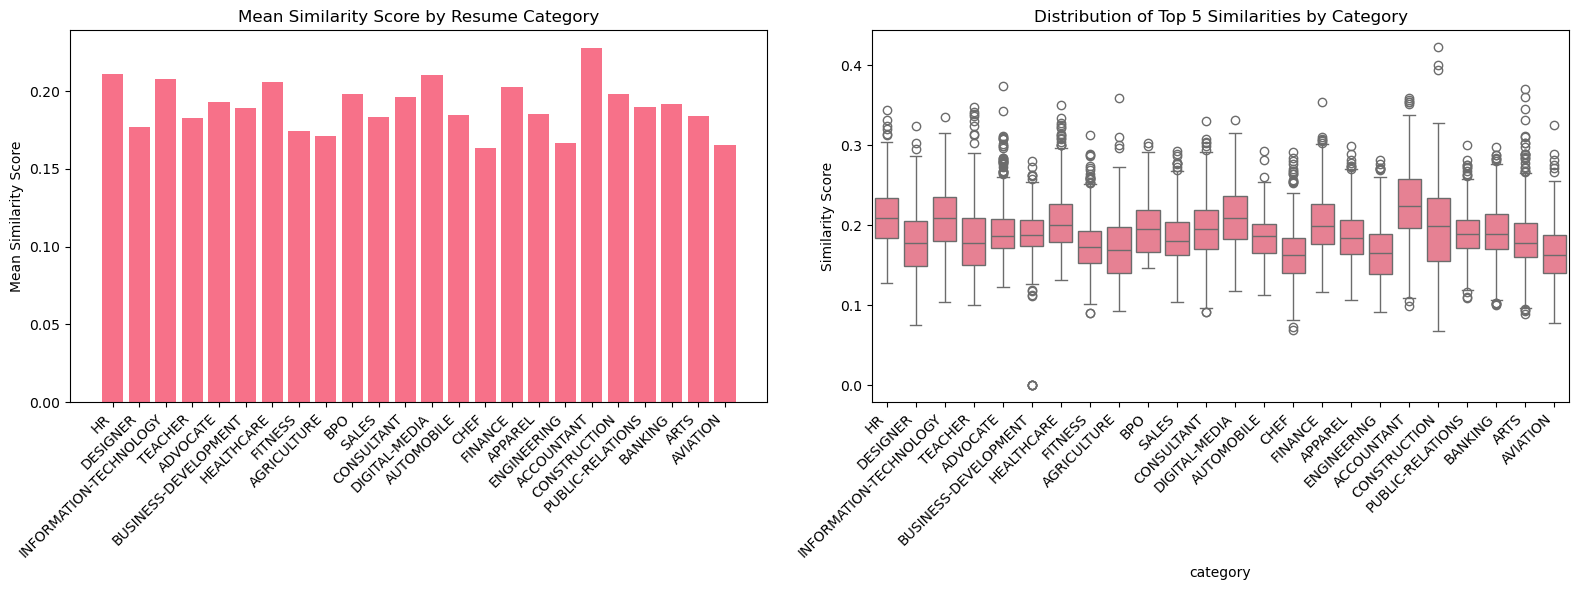

In [26]:
# Visualize match quality by category
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Mean similarity by category
categories = list(category_similarity_stats.keys())
mean_similarities = [category_similarity_stats[cat]['mean_similarity'] for cat in categories]

axes[0].bar(categories, mean_similarities)
axes[0].set_title('Mean Similarity Score by Resume Category')
axes[0].set_ylabel('Mean Similarity Score')
axes[0].set_xticklabels(categories, rotation=45, ha='right')

# Distribution of top similarities
all_top_similarities = []
category_labels = []
for category in categories:
    category_indices = resume_df[resume_df['Category'] == category].index
    category_similarities = similarity_matrix[category_indices]
    
    for idx in range(len(category_indices)):
        top_5_scores = np.sort(category_similarities[idx])[-5:]
        all_top_similarities.extend(top_5_scores)
        category_labels.extend([category] * len(top_5_scores))

similarity_dist_df = pd.DataFrame({
    'similarity': all_top_similarities,
    'category': category_labels
})

sns.boxplot(data=similarity_dist_df, x='category', y='similarity', ax=axes[1])
axes[1].set_title('Distribution of Top 5 Similarities by Category')
axes[1].set_ylabel('Similarity Score')
axes[1].set_xticklabels(categories, rotation=45, ha='right')

plt.tight_layout()
plt.show()

Now we will do feature importance analysis via TF-IDF weight itself as a proxy for how characteristic a term is of a given category.

The mean TF-IDF score for term _j_ across a category is given by:

$$
\mathrm{mean\_tfidf}_j = \frac{1}{D} \sum_{i=1}^{D} \mathrm{tfidf}_{i,j}
$$

where _D_ is the number of resumes in that category.

However, there exists a premade function to do it and to avoid the silly calculations, so we'll use that.

In [27]:
# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Calculate average TF-IDF scores for each category
category_tfidf_profiles = {}
for category in resume_df['Category'].unique():
    category_indices = resume_df[resume_df['Category'] == category].index
    category_tfidf = resume_tfidf_matrix[category_indices]
    
    # Calculate mean TF-IDF scores for this category
    mean_tfidf = np.array(category_tfidf.mean(axis=0)).flatten()
    
    # Get top 20 features and then [::-1] to get descending order
    top_feature_indices = np.argsort(mean_tfidf)[-20:][::-1]
    top_features = [(feature_names[idx], mean_tfidf[idx]) for idx in top_feature_indices]
    
    category_tfidf_profiles[category] = top_features
    
    print(f"\nTop 20 TF-IDF features for {category}:")
    for feature, score in top_features:
        print(f"{feature}: {score:.4f}")


Top 20 TF-IDF features for HR:
human resource: 0.0824
human: 0.0751
employee: 0.0653
resource: 0.0593
employee relation: 0.0534
benefit: 0.0514
recruitment: 0.0512
payroll: 0.0512
hire: 0.0511
new hire: 0.0462
compensation: 0.0439
policy: 0.0436
recruiting: 0.0431
hris: 0.0417
management: 0.0412
performance management: 0.0404
relation: 0.0397
interview: 0.0395
process: 0.0385
orientation: 0.0380

Top 20 TF-IDF features for DESIGNER:
designer: 0.1188
design: 0.0764
graphic: 0.0545
designer company: 0.0507
city: 0.0470
city state: 0.0465
graphic designer: 0.0450
name: 0.0414
company name: 0.0413
name city: 0.0398
designer summary: 0.0390
adobe: 0.0366
interior: 0.0354
art: 0.0351
project: 0.0346
create: 0.0332
illustrator: 0.0320
material: 0.0315
drawing: 0.0300
client: 0.0292

Top 20 TF-IDF features for INFORMATION-TECHNOLOGY:
information technology: 0.0866
technology: 0.0642
network: 0.0638
server: 0.0606
hardware: 0.0544
system: 0.0506
information: 0.0478
software: 0.0472
security: 0

This was pretty much it with the TF-IDF approach, now let's do a finall overall comparison and save the datasets and the vectorizer model.

In [28]:
# Calculate overall statistics
overall_stats = {
    'total_resumes': len(resume_df),
    'total_jds': len(jd_df),
    'total_comparisons': len(resume_df) * len(jd_df),
    'avg_similarity': similarity_matrix.mean(),
    'similarity_std': similarity_matrix.std(),
    'high_similarity_pairs': np.sum(similarity_matrix > 0.3),
    'very_high_similarity_pairs': np.sum(similarity_matrix > 0.5),
    'vocab_size': len(feature_names)
}

print("Overall System Statistics:")
for key, value in overall_stats.items():
    if isinstance(value, float):
        print(f"{key}: {value:.4f}")
    else:
        print(f"{key}: {value}")

# Calculate percentage of high similarity matches
high_sim_percentage = (overall_stats['high_similarity_pairs'] / overall_stats['total_comparisons']) * 100
very_high_sim_percentage = (overall_stats['very_high_similarity_pairs'] / overall_stats['total_comparisons']) * 100

print(f"\nMatch Quality Assessment:")
print(f"Pairs with similarity > 0.3: {high_sim_percentage:.2f}%")
print(f"Pairs with similarity > 0.5: {very_high_sim_percentage:.2f}%")

Overall System Statistics:
total_resumes: 2484
total_jds: 853
total_comparisons: 2118852
avg_similarity: 0.0739
similarity_std: 0.0346
high_similarity_pairs: 122
very_high_similarity_pairs: 0
vocab_size: 5000

Match Quality Assessment:
Pairs with similarity > 0.3: 0.01%
Pairs with similarity > 0.5: 0.00%


As anticipated from above, the results aren't that good. So perhaps using a sentance model could lead to better outcomes.

In [29]:
# Save cleaned datasets
resume_df.to_csv('processed_resumes.csv', index=False)
jd_df.to_csv('processed_jds.csv', index=False)

# Save similarity matrix
np.save('similarity_matrix.npy', similarity_matrix)

# Save TF-IDF vectorizer
import joblib
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

## 🔺 Detyra 3: Ndërtimi i Modelit të Vlerësimit të Talenteve

***Niveli:*** Avancuar


***Objektivat:***
- Përdorni fushat nga `model_response` për të ndërtuar karakteristika të strukturuara
- Zhvilloni një model që jep një vlerësim të përputhshmërisë
- Testoni dhe vlerësoni performancën e modelit